### IA - ATIVIDADE AVALIATIVA SPRINT # 1
Implementar EDA para um Dataset que desejar (recomendável fazer uso de tipo de dataset útil para seu projeto) - relatar brevemente em markdown, em células do notebook do projeto, estratégias para melhor compreensão e preparação dos dados – não serão aceitos datasets iguais na turma – Atividade Individual entregue pelo Teams. Data: 12/09/23

# Avaliação sobre quais caracteristicas impactam a expectativa de vida nos países

In [320]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("world-data-2023.csv",sep=",") 
# print(df.head())
# print(df.info())
# print(df.describe())
# print(df.describe(include='O'))
#print(df.columns)


#### Função para eleminar outliers

In [321]:
def calcular_iqr(df, coluna, multiplicador=1.5):

    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    
    IQR = Q3 - Q1
    
    upper_limit = Q3 + multiplicador * IQR
    lower_limit = Q1 - multiplicador * IQR
    
    return IQR, lower_limit, upper_limit

#### Transformando Strings em tipos uteis 

In [322]:
if type(df['Density(P/Km2)'][0]) is str:
    df['Density(P/Km2)'] = df['Density(P/Km2)'].str.replace(',', '').astype(int)

if type(df['Land Area(Km2)'][0]) is str:
    df['Land Area(Km2)'] = df['Land Area(Km2)'].str.replace(',', '').astype(float)

if type(df['Armed Forces size'][0]) is str:
    df['Armed Forces size'] = df['Armed Forces size'].str.replace(',', '').astype(float)

if type(df['Co2-Emissions'][0]) is str:
    df['Co2-Emissions'] = df['Co2-Emissions'].str.replace(',', '').astype(float)

if type(df['CPI'][0]) is str:
    df['CPI'] = df['CPI'].str.replace(',', '').astype(float)

if type(df['CPI Change (%)'][0]) is str:
    df['CPI Change (%)'] = df['CPI Change (%)'].str.replace('%', '').astype(float)

if type(df['Fertility Rate'][0]) is str:
    df['Fertility Rate'] = df['Fertility Rate'].str.replace(',', '').astype(float)

if type(df['Forested Area (%)'][0]) is str:
    df['Forested Area (%)'] = df['Forested Area (%)'].str.replace('%', '').astype(float)

if type(df['GDP'][0]) is str:
    df['GDP'] = df['GDP'].str.replace('$', '').str.replace(',', '').astype(float)

if type(df['Gross primary education enrollment (%)'][0]) is str:
    df['Gross primary education enrollment (%)'] = df['Gross primary education enrollment (%)'].str.replace('%', '').astype(float)

if type(df['Gross tertiary education enrollment (%)'][0]) is str:
    df['Gross tertiary education enrollment (%)'] = df['Gross tertiary education enrollment (%)'].str.replace('%', '').astype(float)

if type(df['Minimum wage'][0]) is str:
    df['Minimum wage'] = df['Minimum wage'].str.replace('$', '').astype(float)

if type(df['Out of pocket health expenditure'][0]) is str:
    df['Out of pocket health expenditure'] = df['Out of pocket health expenditure'].str.replace('%', '').astype(float)

if type(df['Population'][0]) is str:
    df['Population'] = df['Population'].str.replace(',', '').astype(float)

if type(df['Population: Labor force participation (%)'][0]) is str:
    df['Population: Labor force participation (%)'] = df['Population: Labor force participation (%)'].str.replace('%', '').astype(float)

if type(df['Tax revenue (%)'][0]) is str:
    df['Tax revenue (%)'] = df['Tax revenue (%)'].str.replace('%', '').astype(float)

if type(df['Total tax rate'][0]) is str:
    df['Total tax rate'] = df['Total tax rate'].str.replace('%', '').astype(float)

if type(df['Unemployment rate'][0]) is str:
    df['Unemployment rate'] = df['Unemployment rate'].str.replace('%', '').astype(float)

if type(df['Urban_population'][0]) is str:
    df['Urban_population'] = df['Urban_population'].str.replace(',', '').astype(float)


In [323]:
colunas_numericas = df.select_dtypes(include=['float64', 'int64'])
for x in colunas_numericas.columns:
    correlacao = colunas_numericas['Life expectancy'].corr(colunas_numericas[x])
    print(f"Correlação de expectativa de vida com {x}: {correlacao}")
    

Correlação de expectativa de vida com Land Area(Km2): 0.0549213750175302
Correlação de expectativa de vida com Armed Forces size: 0.0759432675856461
Correlação de expectativa de vida com Birth Rate: -0.8747472099732815
Correlação de expectativa de vida com Calling Code: -0.034623574927965924
Correlação de expectativa de vida com Co2-Emissions: 0.12189112647545505
Correlação de expectativa de vida com CPI: -0.18165628963082386
Correlação de expectativa de vida com CPI Change (%): -0.15008717047534473
Correlação de expectativa de vida com Fertility Rate: -0.8491528107360005
Correlação de expectativa de vida com Forested Area (%): 0.005900125571709311
Correlação de expectativa de vida com GDP: 0.17575533555080186
Correlação de expectativa de vida com Gross primary education enrollment (%): 0.0949065439889931
Correlação de expectativa de vida com Gross tertiary education enrollment (%): 0.7225347334725577
Correlação de expectativa de vida com Infant mortality: -0.924675322674509
Correlação

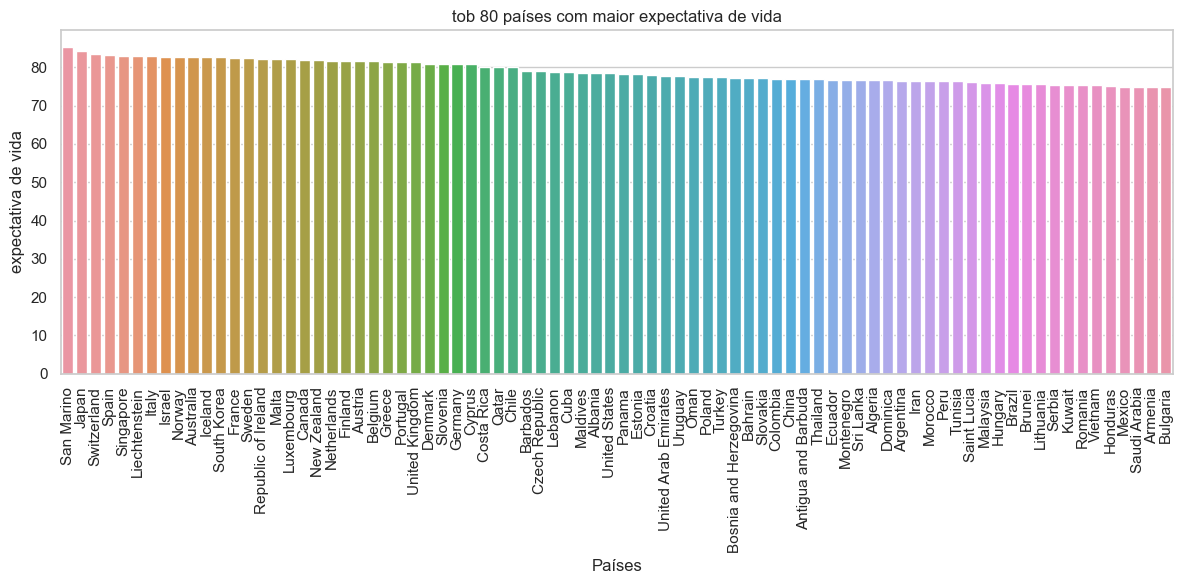

In [324]:
sns.set(style="whitegrid")
df30=df.nlargest(80, 'Life expectancy')
plt.figure(figsize=(12, 6))  
sns.barplot(x='Country', y='Life expectancy', data=df30)

# Configure os rótulos e título
plt.xlabel('Países')
plt.ylabel('expectativa de vida')
plt.title('tob 80 países com maior expectativa de vida')

# Rotação dos rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Exiba o gráfico
plt.tight_layout()  # Garante que os rótulos não se sobreponham
plt.show()

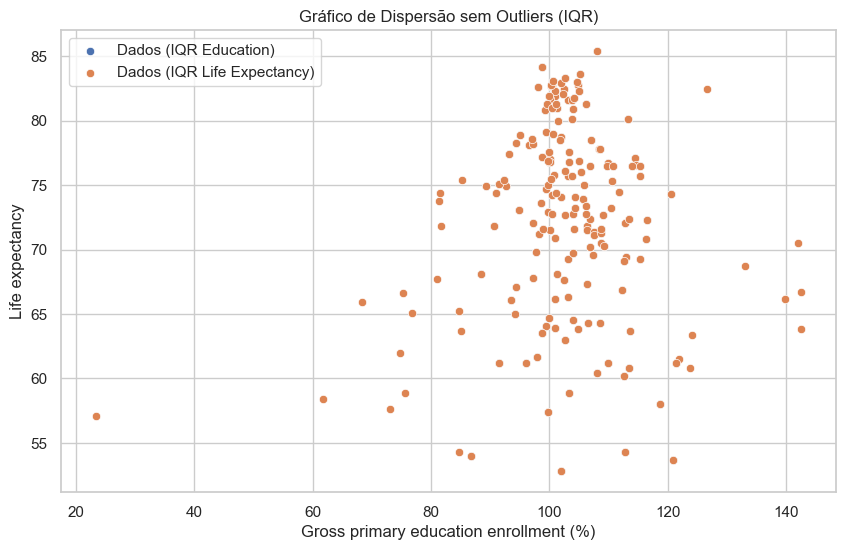

In [325]:
iqr_education, lower_limit_education, upper_limit_education = calcular_iqr(df, 'Gross primary education enrollment (%)')

# Calcula o IQR e os limites para 'Life expectancy'
iqr_life_expectancy, lower_limit_life_expectancy, upper_limit_life_expectancy = calcular_iqr(df, 'Life expectancy')

# Filtra os pontos dentro do intervalo IQR para ambas as colunas
filtered_education = df[(df['Gross primary education enrollment (%)'] >= lower_limit_education) & (df['Gross primary education enrollment (%)'] <= upper_limit_education)]
filtered_life_expectancy = df[(df['Life expectancy'] >= lower_limit_life_expectancy) & (df['Life expectancy'] <= upper_limit_life_expectancy)]

# Crie o gráfico de dispersão apenas com os pontos dentro do IQR
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Gráfico de dispersão para 'Gross primary education enrollment (%)' e 'Life expectancy'
sns.scatterplot(data=filtered_education, x='Gross primary education enrollment (%)', y='Life expectancy', label='Dados (IQR Education)')
sns.scatterplot(data=filtered_life_expectancy, x='Gross primary education enrollment (%)', y='Life expectancy', label='Dados (IQR Life Expectancy)')

plt.xlabel('Gross primary education enrollment (%)')
plt.ylabel('Life expectancy')
plt.title('Gráfico de Dispersão sem Outliers (IQR)')

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


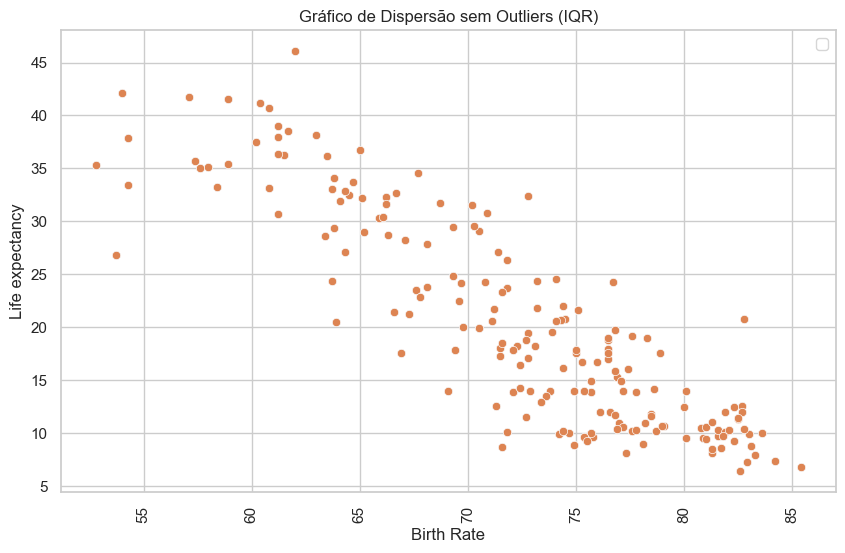

In [326]:
iqr_birth_rate, lower_limit_birth_rate, upper_limit_birth_rate = calcular_iqr(df, 'Birth Rate')

# Calcula o IQR e os limites para 'Life expectancy'
iqr_life_expectancy, lower_limit_life_expectancy, upper_limit_life_expectancy = calcular_iqr(df, 'Life expectancy')

# Filtra os pontos dentro do intervalo IQR para ambas as colunas
filtered_birth_rate = df[(df['Birth Rate'] >= lower_limit_birth_rate) & (df['Birth Rate'] <= upper_limit_birth_rate)]
filtered_life_expectancy = df[(df['Life expectancy'] >= lower_limit_life_expectancy) & (df['Life expectancy'] <= upper_limit_life_expectancy)]

# Crie o gráfico de dispersão apenas com os pontos dentro do IQR
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Gráfico de dispersão para 'Birth Rate' e 'Life expectancy'
sns.scatterplot(data=filtered_birth_rate, x='Life expectancy', y='Birth Rate')
sns.scatterplot(data=filtered_life_expectancy, x='Life expectancy', y='Birth Rate')
plt.xlabel('Birth Rate')
plt.ylabel('Life expectancy')
plt.title('Gráfico de Dispersão sem Outliers (IQR)')
plt.xticks(rotation=90)

plt.legend()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


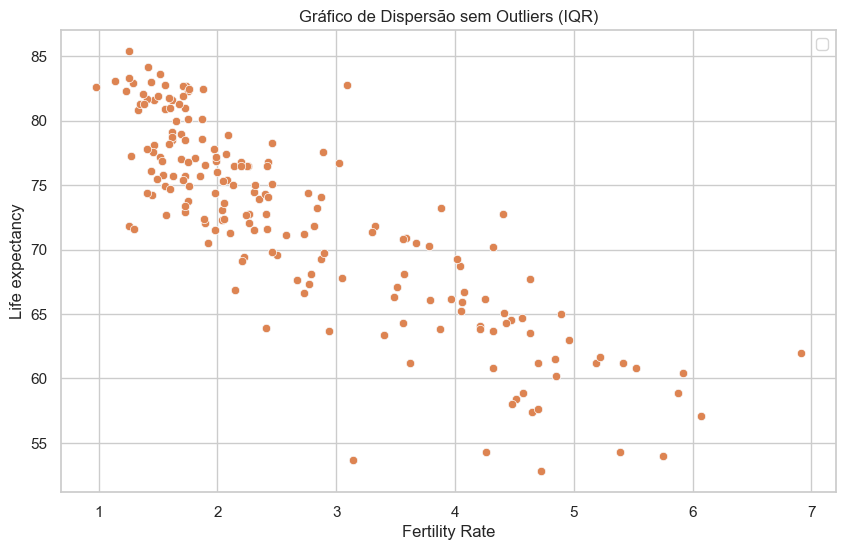

In [327]:
iqr_fertility_rate, lower_limit_fertility_rate, upper_limit_fertility_rate = calcular_iqr(df, 'Fertility Rate')

# Calcula o IQR e os limites para 'Life expectancy'
iqr_life_expectancy, lower_limit_life_expectancy, upper_limit_life_expectancy = calcular_iqr(df, 'Life expectancy')

# Filtra os pontos dentro do intervalo IQR para ambas as colunas
filtered_fertility_rate = df[(df['Fertility Rate'] >= lower_limit_fertility_rate) & (df['Fertility Rate'] <= upper_limit_fertility_rate)]
filtered_life_expectancy = df[(df['Life expectancy'] >= lower_limit_life_expectancy) & (df['Life expectancy'] <= upper_limit_life_expectancy)]

# Crie o gráfico de dispersão apenas com os pontos dentro do IQR
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Gráfico de dispersão para 'Fertility Rate' e 'Life expectancy'
sns.scatterplot(data=filtered_fertility_rate, x='Fertility Rate', y='Life expectancy', )
sns.scatterplot(data=filtered_life_expectancy, x='Fertility Rate', y='Life expectancy', )

plt.xlabel('Fertility Rate')
plt.ylabel('Life expectancy')
plt.title('Gráfico de Dispersão sem Outliers (IQR)')

plt.legend()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


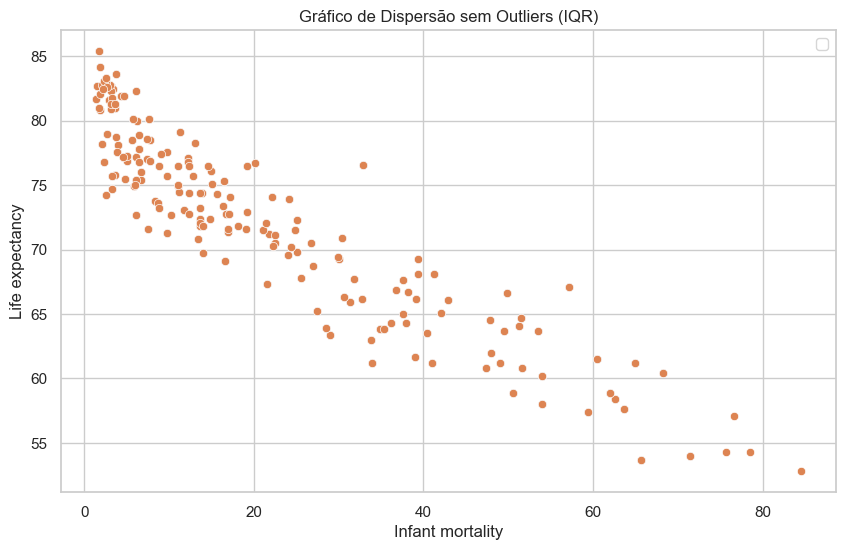

In [328]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que 'df' seja o seu DataFrame com as colunas 'Infant mortality' e 'Life expectancy'

# Calcula o IQR e os limites para 'Infant mortality'
iqr_infant_mortality, lower_limit_infant_mortality, upper_limit_infant_mortality = calcular_iqr(df, 'Infant mortality')

# Calcula o IQR e os limites para 'Life expectancy'
iqr_life_expectancy, lower_limit_life_expectancy, upper_limit_life_expectancy = calcular_iqr(df, 'Life expectancy')

# Filtra os pontos dentro do intervalo IQR para ambas as colunas
filtered_infant_mortality = df[(df['Infant mortality'] >= lower_limit_infant_mortality) & (df['Infant mortality'] <= upper_limit_infant_mortality)]
filtered_life_expectancy = df[(df['Life expectancy'] >= lower_limit_life_expectancy) & (df['Life expectancy'] <= upper_limit_life_expectancy)]

# Crie o gráfico de dispersão apenas com os pontos dentro do IQR
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Gráfico de dispersão para 'Infant mortality' e 'Life expectancy'
sns.scatterplot(data=filtered_infant_mortality, x='Infant mortality', y='Life expectancy')
sns.scatterplot(data=filtered_life_expectancy, x='Infant mortality', y='Life expectancy')

plt.xlabel('Infant mortality')
plt.ylabel('Life expectancy')
plt.title('Gráfico de Dispersão sem Outliers (IQR)')

plt.legend()
plt.show()







No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


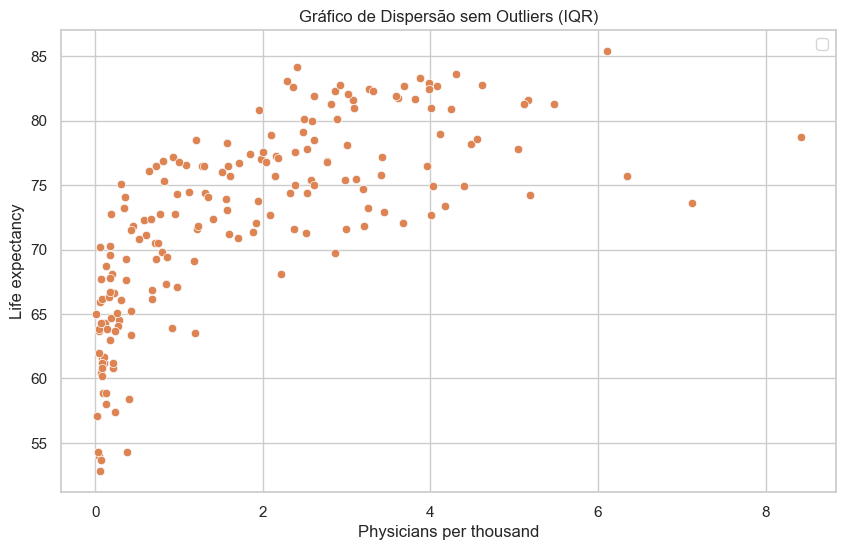

In [329]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que 'df' seja o seu DataFrame com as colunas 'Physicians per thousand' e 'Life expectancy'

# Calcula o IQR e os limites para 'Physicians per thousand'
iqr_physicians_per_thousand, lower_limit_physicians_per_thousand, upper_limit_physicians_per_thousand = calcular_iqr(df, 'Physicians per thousand')

# Calcula o IQR e os limites para 'Life expectancy'
iqr_life_expectancy, lower_limit_life_expectancy, upper_limit_life_expectancy = calcular_iqr(df, 'Life expectancy')

# Filtra os pontos dentro do intervalo IQR para ambas as colunas
filtered_physicians_per_thousand = df[(df['Physicians per thousand'] >= lower_limit_physicians_per_thousand) & (df['Physicians per thousand'] <= upper_limit_physicians_per_thousand)]
filtered_life_expectancy = df[(df['Life expectancy'] >= lower_limit_life_expectancy) & (df['Life expectancy'] <= upper_limit_life_expectancy)]

# Crie o gráfico de dispersão apenas com os pontos dentro do IQR
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Gráfico de dispersão para 'Physicians per thousand' e 'Life expectancy'
sns.scatterplot(data=filtered_physicians_per_thousand, x='Physicians per thousand', y='Life expectancy')
sns.scatterplot(data=filtered_life_expectancy, x='Physicians per thousand', y='Life expectancy')

plt.xlabel('Physicians per thousand')
plt.ylabel('Life expectancy')
plt.title('Gráfico de Dispersão sem Outliers (IQR)')

plt.legend()
plt.show()

### Outros Graficos

c:\Users\lucca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

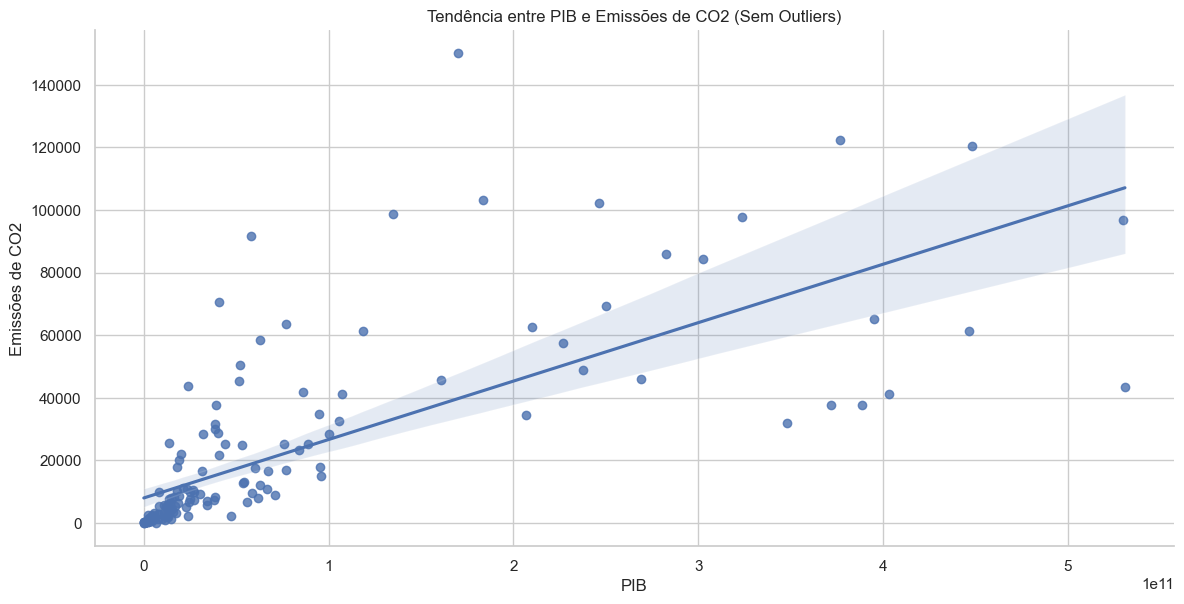

In [330]:




IQR_GDP,lower_limit_GDP,upper_limit_GDP = calcular_iqr(df,'GDP')

IQR_CO2,lower_limit_CO2,upper_limit_CO2 = calcular_iqr(df,'Co2-Emissions')



df_sem_outliers = df[(df['GDP'] >= lower_limit_GDP) & (df['GDP'] <= upper_limit_GDP) &
                     (df['Co2-Emissions'] >= lower_limit_CO2) & (df['Co2-Emissions'] <= upper_limit_CO2)]

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.lmplot(x='GDP', y='Co2-Emissions', data=df_sem_outliers, height=6, aspect=2)
plt.xlabel('PIB')
plt.ylabel('Emissões de CO2')
plt.title('Tendência entre PIB e Emissões de CO2 (Sem Outliers)')
plt.grid(True)

plt.show()




<Axes: >

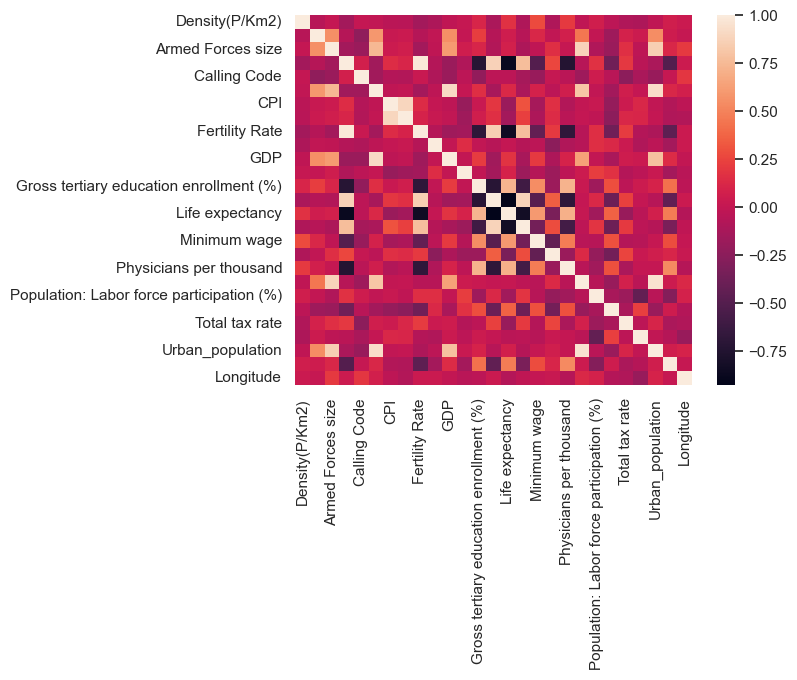

In [331]:
for nome in colunas:
    if(type(df[nome][0]) is str):df.drop(nome ,axis=1, inplace=True)

correlacao=df.corr()
sns.heatmap(df.corr())